# STK1100 - Mandatory assignment 2
## William Dugan

### Task 1a
$$
    f(x, y) = 
    \left\{\begin{matrix}
    k(x+2y) & 0\leq x, y \leq 1, x+y\leq 1 \\ 
    0 & \text{Otherwise}
    \end{matrix}\right.
$$
To find $k$, we need to have $\iint_\mathbb{R} f(x, y)dxdy = 1$.
\begin{align*}
    \iint_\mathbb{R} f(x, y)dxdy
    &= k \int_0^1 \int_0^{1-x} (x+2y)dydx \\
    &= k \int_0^1 (1-x)dx \\
    &= \frac{k}{2}\\
    \implies k &= 2
\end{align*}

### Task 1b
\begin{align*}
    f_Y(y) 
    &= \int_{\mathbb{R}} f(x, y)dx \\
    &= \int_0^{1-y} 2(x+2y)dx \\
    &= [x^2 + 4xy]_{x=0}^{x=1-y} \\
    &= 1 - 2y + y^2 + 4y - 4y^2 \\
    &= 1 + 2y - 3y^2, &  0 \leq y \leq 1
\end{align*}

### Task 1c
\begin{align*}
    f_{X|Y}(y) 
    &= \frac{f(x, y)}{f_Y(y)} \\
    &= \frac{2(x+2y)}{1+2y-3y^2} \\
    &= \frac{2x+4y}{1+2y-3y^2}
\end{align*}

### Task 1d
X and Y are independent if $ f_X(x) f_Y(y) = f(x, y)$. First we need to find $f_X(x)$:
\begin{align*}
    f_X(x) = \int_{\mathbb{R}} f(x, y) dy = \int_0^{1-x} (2x+4y)dy = 2-2x
\end{align*}
We can now calculate $f_X(x) f_Y(y)$:
\begin{align*}
    f_X(x) f_Y(y) 
    &= (2-2x)(1+2y-3y^2) \\
    &= 2 + 4y - 6y^2 - 2x - 4xy + 6xy^2 \\
    &\ne f(x, y)
\end{align*}
which means that $X$ and $Y$ are dependent.

### Task 2a

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats, scipy.interpolate

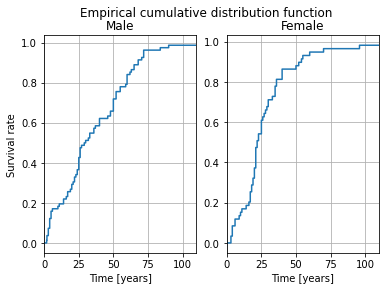

In [31]:
time = pd.read_csv(
    'https://www.uio.no/studier/emner/matnat/math/STK1100/data/egypt_data.txt',
    header=None
)

t_m = np.asarray(time[:82]).flatten()
t_f = np.asarray(time[82:]).flatten()

def empirical_cdf(x):
    return scipy.interpolate.interp1d(
                np.sort(x), 
                np.arange(len(x))/float(len(x)), 
                kind = 'zero', 
                fill_value = 'extrapolate'
            )

fig, ax = plt.subplots(ncols=2, sharex=True)
fig.suptitle('Empirical cumulative distribution function')
z = np.linspace(0, 110, 1000)

F_m = empirical_cdf(t_m)
ax[0].step(z, F_m(z))
ax[0].set(
    xlabel = 'Time [years]',
    ylabel = 'Survival rate',
    title = 'Male',
    xlim = (0, 110)
)
ax[0].grid()

F_f = empirical_cdf(t_f)
ax[1].step(z, F_f(z))
ax[1].set(
    xlabel = 'Time [years]',
    title = 'Female',
    xlim = (0, 110)
)
ax[1].grid()

plt.show()

### Task 2b
We can find $\alpha$ and $\beta$ by using $\mathbb{E}(T)=\alpha\beta$ and $\text{Var}(T)=\alpha{\beta}^2$. This is done in $\verb|estimate_moments_gamma(t)|$.

In [32]:
def estimate_moments_gamma(t):
    t_mean = np.mean(t)
    s_sq = np.var(t)

    beta = s_sq / t_mean
    alpha = t_mean / beta
    Ex = alpha * beta

    return alpha, beta, Ex

alpha_m, beta_m, Ex_m = estimate_moments_gamma(t_m)
alpha_f, beta_f, Ex_f = estimate_moments_gamma(t_f)

print(f'Gender: Male')
print(f'Alpha = {alpha_m:.3f}')
print(f'Beta = {beta_m:.3f}')
print(f'E(X) = {Ex_m:.2f} years \n')

print(f'Gender: Male')
print(f'Alpha = {alpha_f:.3f}')
print(f'Beta = {beta_f:.3f}')
print(f'E(X) = {Ex_f:.2f} years')

Gender: Male
Alpha = 2.211
Beta = 15.430
E(X) = 34.12 years 

Gender: Male
Alpha = 2.240
Beta = 11.572
E(X) = 25.92 years


We observe that the life expectancy is higher for males compared to females.

### Task 2c
The transformation is given by $g(y) = f(v(y))|v'(y)|$. We set $Y=e^X$ where $X \sim N(\mu, \sigma)$, which yields $x = \ln y$. This gives $|v'(y)|=v'(y) = \frac{1}{y}$. Using the PDF of a normally distributed random variable, we find

$$
    g(y) = 
    \frac{1}{y \sigma \sqrt{2 \pi }}
    \exp{
        \left[
            - \frac{{(\ln y - \mu)}^2}{2\sigma^2}
        \right]
    }
$$
for $y > 0$.

### Task 2d
Rearranging the given relationships we get
$$
    \mu = \ln \bar{t} - \frac{\sigma^2}{2}, \hspace{0.5cm}
    \sigma^2 = \ln \left[
        1 + \frac{S^2}{{\bar{t}}^2}
    \right]
$$


In [33]:
def estimate_moments_lognormal(t):
    t_mean = np.mean(t)
    s_sq = np.var(t)

    sigma_sq = np.log(s_sq/(t_mean**2) + 1)
    mu = np.log(t_mean) - sigma_sq/2
    Ex = np.exp(mu + sigma_sq/2)

    return mu, sigma_sq, Ex

mu_m, sigma_sq_m, Ex_m = estimate_moments_lognormal(t_m)
mu_f, sigma_sq_f, Ex_f = estimate_moments_lognormal(t_f)

print(f'Gender: Male')
print(f'Mu = {mu_m:.3f}')
print(f'Sigma^2 = {sigma_sq_m:.3f}')
print(f'E(T) = {Ex_m:.2f} years \n')

print(f'Gender: Female')
print(f'Mu = {mu_f:.3f}')
print(f'Sigma^2 = {sigma_sq_f:.3f}')
print(f'E(T) = {Ex_f:.2f} years')

Gender: Male
Mu = 3.343
Sigma^2 = 0.373
E(T) = 34.12 years 

Gender: Female
Mu = 3.071
Sigma^2 = 0.369
E(T) = 25.92 years


We observe that the life expectancy is longer for males compared to females, and the estimation yields the same result as in (b).

### Task 2e

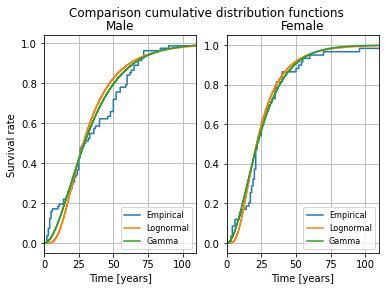

In [34]:
fig, ax = plt.subplots(ncols=2, sharex=True)
fig.suptitle('Comparison cumulative distribution functions')
z = np.linspace(0, 110, 1000)

for i, t in enumerate((t_m, t_f)):
    F = empirical_cdf(t)
    ax[i].step(z, F(z), label='Empirical')

    mu, sigma_sq, Ex = estimate_moments_lognormal(t)
    ax[i].step(
        z,
        scipy.stats.lognorm.cdf(z, s=np.sqrt(sigma_sq), scale=np.exp(mu)),
        label='Lognormal'
    )

    alpha, beta, Ex = estimate_moments_gamma(t)
    ax[i].step(
        z,
        scipy.stats.gamma.cdf(z, a=alpha, scale=beta),
        label='Gamma'
    )

    ax[i].grid('True')
    ax[i].legend(loc='lower right', prop={'size': 8})
    ax[i].set(
        xlabel='Time [years]',
        xlim=(0, 110)
    )

ax[0].set(
    ylabel='Survival rate',
    title='Male',
)

ax[1].set(title='Female')

plt.show()

Both the log-normal and the gamma distribution seem to fit the data. There are some minor differences, and it looks as the gamma distribution is most appropriate for males. For females, the differences between log-normal and gamma are even smaller.

### Task 3a
Let $U \sim \text{uniform}(0, 1)$. The inverse of the cumulative distribution function for a uniformly distributed variable is $F^{-1}(p) = a + p(b - a). Since $a=0, \ b=1$, $F^{-1}(p) = p$. It follows that the cdf of $X=F^{-1}(U)$ is $F(x)$.

### Task 3b
$$
    f_X(x) = 
    \left\{\begin{matrix}
    \frac{\alpha}{\lambda}(1 + \frac{x}{\lambda})^{-(\alpha+1)}) & x>0\\ 
    0 & \text{Otherwise}
    \end{matrix}\right.
$$
where $\alpha, \ \lambda> 0$. The CDF of $X$ is
\begin{align*}
    F_X(x)
    &= \int_{-\infty}^{x} f_X(x) dx = \int_0^{x} f_X(x) dx \\
    &= \alpha \int_0^x u^{-\alpha - 1} du, \hspace{0.5cm} u = 1 + \frac{x}{\lambda} \\
    &= \left[
        \left(
            1 + \frac{x^*}{\lambda}
        \right)^{-\alpha}
    \right]_{x^*=x}^{x^*=0} \\
    &= 1 - \left(
            1 + \frac{x}{\lambda}
        \right)^{-\alpha}, \hspace{0.5cm} x>0
\end{align*}

To find the median we set $F_X(x)=1/2$. Solving for $\bar{X}$:
\begin{align*}
    1 - \left(
            1 + \frac{\bar{X}}{\lambda}
    \right)^{-\alpha}
    &= \frac{1}{2} \\
    \frac{\bar{X}}{\lambda}
    &= \sqrt[\alpha]{2} - 1 \\
    \bar{X} 
    &= \lambda(\sqrt[\alpha]{2} - 1)
\end{align*}

### Task 3c
We can generate $n$ Lomax-distributed observations with $\verb|scipy.stats.lomax|$ using a shape parameter $\verb|c| = \alpha$ and scale parameter $\verb|scale| = \lambda$.

### Task 3d

Analytical median = 12.476
Calculated median = 12.653


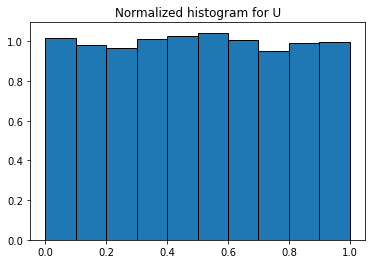

In [35]:
n = 10_000
lmbda = 48
alpha = 3

u = np.random.uniform(0, 1, n)
plt.hist(u, density=True, edgecolor='black')
plt.title('Normalized histogram for U')

x = scipy.stats.lomax(c=alpha, scale=lmbda)
X = x.rvs(size=n)
print(f'Analytical median = {x.median():.3f}')
print(f'Calculated median = {np.median(X):.3f}')

plt.show()

### Task 3e

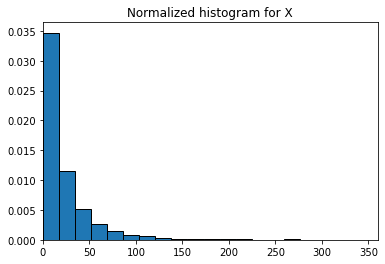

In [36]:
plt.hist(X, bins=50, density=True, edgecolor='black')
plt.title('Normalized histogram for X')
plt.xlim(0, 360)
plt.show()

### Task 3f

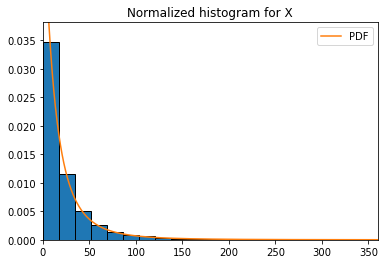

In [37]:
y, *_ = plt.hist(X, bins=50, density=True, edgecolor='black')

t = np.linspace(0, 360, n)
plt.plot(t, x.pdf(t), label='PDF')

plt.title('Normalized histogram for X')
plt.xlim(0, 360)
plt.ylim(None, 1.1*y.max())
plt.legend()
plt.show()

We observe that our method of generating observations from the Lomax-distribution fits with the probability density.

### Task 3g

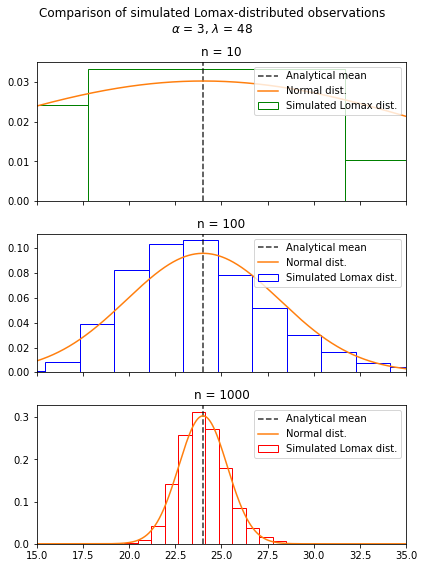

In [38]:
runs = 10_000
averages = np.zeros((3, runs))
x = np.linspace(0, 100, 10_000)
n_list = (10, 100, 1000)
colors = ('green', 'blue', 'red')

ex, var = scipy.stats.lomax.stats(c=alpha, scale=lmbda, moments='mv')

for i, n in enumerate(n_list):
    for j in range(runs):
        X = scipy.stats.lomax.rvs(c=alpha, scale=lmbda, size=n)
        averages[i, j] = np.mean(X)

fig, ax = plt.subplots(nrows=3, figsize=(6, 8), sharex=True, tight_layout=True)

fig.suptitle(
    ''.join(
        str(_) for _ in (
            r'Comparison of simulated Lomax-distributed observations',
            '\n',
            r'$\alpha$ = ',
            alpha,
            r', $\lambda$ = ',
            lmbda
        )
    )
)

for i, (n, color) in enumerate(zip(n_list, colors)):
    ax[i].hist(
        averages[i],
        bins=25,
        density=True,
        fc='none',
        ec=color,
        label='Simulated Lomax dist.'
    )
    ax[i].set(
        xlim = (15, 35), 
        title = f'n = {n}'
    )
    ax[i].axvline(
        ex,
        ls='--',
        color='k',
        label='Analytical mean',
        alpha=0.8
    )
    ax[i].plot(
        x,
        scipy.stats.norm.pdf(x, loc=ex, scale=np.sqrt(var/n)),
        label='Normal dist.'
    )
    ax[i].legend(loc='upper right', prop={'size': 10})

plt.show()


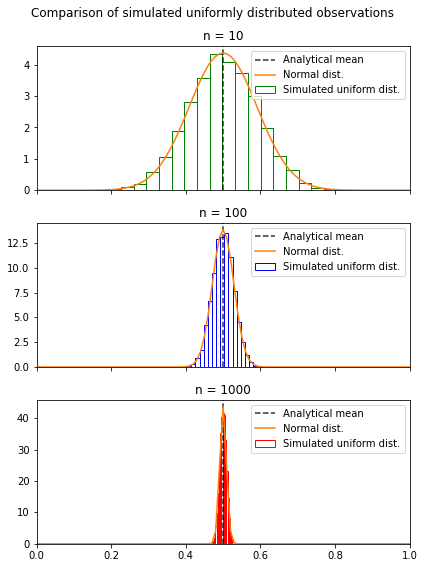

In [39]:
averages = np.zeros((3, runs))

ex, var = scipy.stats.uniform.stats(moments='mv')

for i, n in enumerate(n_list):
    for j in range(runs):
        X = scipy.stats.uniform.rvs(size=n)
        averages[i, j] = np.mean(X)

fig, ax = plt.subplots(nrows=3, figsize=(6, 8), sharex=True, tight_layout=True)

fig.suptitle('Comparison of simulated uniformly distributed observations')

for i, (n, color) in enumerate(zip(n_list, colors)):
    ax[i].hist(
        averages[i],
        bins=20,
        density=True,
        fc='none',
        ec=color,
        label='Simulated uniform dist.'
    )
    ax[i].set(
        xlim = (0., 1), 
        title = f'n = {n}'
    )
    ax[i].axvline(
        ex,
        ls='--',
        color='k',
        label='Analytical mean',
        alpha=0.8
    )
    ax[i].plot(
        x,
        scipy.stats.norm.pdf(x, loc=ex, scale=np.sqrt(var/n)),
        label='Normal dist.'
    )
    ax[i].legend(loc='upper right', prop={'size': 10})

plt.show()

We observe that both simulations tends toward a normal distribution, even though the original variables are Lomax and Uniformly distributed. This is due to the central limit theorem, which says that when independent variables are summed up, their normalized sum tends toward a normal distribution. 